# 1. Linear regression

# Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (x) variables, hence called as linear regression.

# 1. Simple Linear Regression:

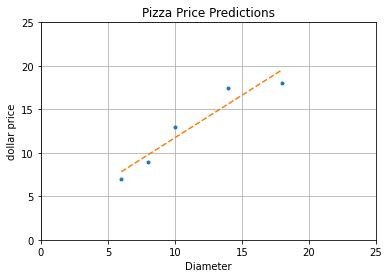

[[22.46767241]]


In [2]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

x = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]

model = LinearRegression()
model.fit(x,y)

plt.figure()
plt.title('Pizza Price Predictions')
plt.xlabel('Diameter')
plt.ylabel('dollar price')
plt.plot(x,y,'.')
plt.plot(x,model.predict(x),'--')
plt.axis([0,25,0,25])
plt.grid(True)
plt.show()

print (model.predict([[21]]))

# Cost function

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np
from numpy.linalg import inv,lstsq
from numpy import dot, transpose

x = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]

model = LinearRegression()
model.fit(x,y)

print ('Residual sum of squares = ',np.mean((model.predict(x)- y) ** 2))
print ('Variance = ',np.var([6, 8, 10, 14, 18], ddof=1))
print ('Co-variance = ',np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1])

Residual sum of squares =  1.7495689655172406
Variance =  23.2
Co-variance =  22.650000000000002


# 2. Multiple Linear regression

Multiple Linear Regression is an extension of Simple Linear regression as it
takes more than one predictor variable to predict the response variable.

y=a0+a1x+a2x

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#importing data set
df=pd.read_csv("E:/F/TARIQ/New folder/startup.csv")
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
x=df.iloc[:,:-1]
y=df.iloc[:,4]

In [10]:
#coverting the column into cateorical columns
states=pd.get_dummies(x['State'],drop_first=True)

In [11]:
#drop the state column
x=x.drop('State',axis=1)
#concate the dummy variable
x=pd.concat([x,states], axis=1)

In [12]:
x.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [14]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [16]:
score

0.9347068473282423

# 3. Polynomial regression

# y= b0+b1x1+ b2x12+ b2x13+...... bnx1n

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly_regs=PolynomialFeatures(degree=2)
x_polynomial=poly_regs.fit_transform(x)
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_polynomial, y)  
x_polynomial

array([[1.0000000e+00, 1.6534920e+05, 1.3689780e+05, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.6259770e+05, 1.5137759e+05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.5344151e+05, 1.0114555e+05, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 0.0000000e+00, 1.3542692e+05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.4205000e+02, 5.1743150e+04, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.1698380e+05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

# Basic assumption